X:
 [[ 0.00000000e+00  0.00000000e+00]
 [-9.09216897e-04  1.00600064e-02]
 [-3.86716928e-03  1.98284296e-02]
 [ 9.38562084e-03  2.88129097e-02]
 [ 1.63140519e-02  3.69640121e-02]
 [-1.08034609e-02  4.93360452e-02]
 [ 2.36229805e-02  5.58126274e-02]
 [-4.66319669e-03  7.05531321e-02]
 [ 8.17199241e-03  8.03938086e-02]
 [ 3.99078158e-02  8.16812650e-02]
 [-4.06661532e-03  1.00928208e-01]
 [ 6.40663973e-02  9.07809217e-02]
 [ 4.98544515e-02  1.10484895e-01]
 [ 9.48507151e-02  9.08101332e-02]
 [ 9.00379380e-02  1.09046454e-01]
 [ 7.98602254e-02  1.28760186e-01]
 [ 1.19574985e-01  1.08727213e-01]
 [ 1.61193503e-01  5.91898776e-02]
 [ 1.02421284e-01  1.50225603e-01]
 [ 1.05817719e-01  1.60111169e-01]
 [ 1.16921965e-01  1.64746521e-01]
 [ 1.22392778e-01  1.73249579e-01]
 [ 2.17087756e-01  4.74933893e-02]
 [ 1.95214878e-01  1.25957277e-01]
 [ 1.90727592e-01  1.49641234e-01]
 [ 1.97351949e-01  1.57547489e-01]
 [ 1.85736171e-01  1.85673446e-01]
 [ 2.60254535e-01  8.15336887e-02]
 [ 2.55478044e-0

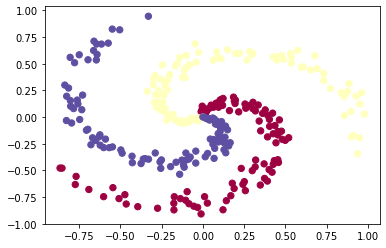

In [ ]:
"""Complete implementation of spiral data-set in 2-dimension. Classification of 
N-number of data-set into 3 class[r,g,y]. We here code a 2-layeres neural 
network using the neural network with one hidden layer consisting of 100 neurons.
"""
import numpy as np
import matplotlib.pyplot as plt
N=100 #number of data-points for each class
D=2 #Dimensionality
K=3 #number of class [r,b,y]
X=np.zeros((N*K,D)) #[300,2]Every data-points(N*K) is converted into D-dimension i.e 2-D 
y=np.zeros((N*K),dtype='uint8') #[300]label or assigning class to every data-point

#1 Genrating the spiral data-set for 3 classes
for j in range(K):        #Looping over the 3 classes
  ix= range(N*j,N*(j+1))  #Dividing the dataset as (0,100) (100,200) (200,300)
  r=np.linspace(0.0,1,N)  #Assigning the radius for every N data-points
  t_0=np.random.randn(N)*0.2 #Theta value I don't know why multiplied by 0.2
  t=np.linspace(j*4,(j+1)*4,N)+ t_0 #linspace divides (start to end)number n times
  """t_1=r*np.sin(t)                #Here (0 to 4) is divided 100 times
  t_2=r*np.cos(t)
  print(t_1)
  print(t_2)"""
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j   #1-D array where all the data-points are assigned with their correct class
              #Here,the data-points from(0,100) is assigned as 0,(100,200) as 1 and(200,300) as 2
print("X:\n",X)
print("y:\n",y)
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c =y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#2 Initialization of parameters
h=100 #number of neurons in hidden layer
W1= 0.01*np.random.randn(D,h) #[2,100]
b1=np.zeros((1,h)) #[1,100]
W2=0.01*np.random.randn(h,K)  #[100,3]
b2=np.zeros((1,K)) #[1,3]

print("W1:\n",W1) #[2,100]
print("W2:\n",W2) #[100,3]

W1:
 [[ 1.07225475e-02  3.71112039e-03  1.37421734e-02 -2.78801004e-03
   1.40127968e-02 -3.61675472e-03  3.48069946e-02 -4.36235483e-03
   9.20071773e-03  1.63837527e-02  1.93443974e-02 -4.94699005e-03
   1.71205741e-02  1.59479131e-03 -1.56440569e-02  1.38450211e-02
  -4.60381039e-03 -1.10413613e-02 -4.20765137e-03  8.22897258e-03
   1.77283867e-02 -1.36118509e-03  2.01820858e-02  2.70616204e-03
  -1.95185392e-02  1.82097209e-02 -1.27515581e-02  9.06918071e-03
   1.03651437e-02  4.31648669e-03 -1.22449598e-02  2.63469317e-03
   8.43357516e-03 -7.68197685e-03  3.40219274e-04 -8.82920864e-03
  -2.03192289e-03 -1.16261223e-02  5.63178982e-03 -5.65608510e-03
   2.72655004e-02 -1.02911204e-02  9.20770756e-03  6.82880730e-03
  -6.09386457e-03  8.26917538e-03 -1.10894422e-04 -1.10767552e-02
   6.81023626e-04  2.38970187e-04  1.63332160e-02 -2.40471248e-04
  -1.11355430e-02  9.95014090e-03  1.21926205e-02 -7.69066466e-03
   4.08405091e-03 -1.05224340e-02 -7.62356881e-03 -6.16066445e-03
   1.

In [ ]:
step_size=1e-0 #hyperparameters
reg=1e-3

#gradient descent loop
num_examples=X.shape[0] #N*K=300
for i in range(10000):
  
#Forwardfeed implementation
  A=lambda x: np.maximum(0,x) #ReLU actvation function

  H1= A(np.dot(X,W1)+b1) #[300,2]*[2*100]=[300,100]
  scores=np.dot(H1,W2)+b2 #[300,100]*[100,3]=[300,3]
  #print(H1.shape)

#3 Computation of loss
#Computation of data-loss
  exp_scores=np.exp(scores)
  exp_sum=np.sum(exp_scores,axis=1,keepdims=True) #[300,1]sum by row of the exponentaited 
  #print(exp_sum.shape)      #scores with keepdims to make matrix 2-D
  probs=exp_scores/exp_sum  #[300,3]As both matrix are in correct shapes now we can divide
  #print("Probs:\n",probs)              #The probs contains with normalized class probabilities for all data-points
  #print("The probs is of size:",probs.shape)

  correct_probs=probs[range(num_examples),y]
  correct_logprobs= -np.log(correct_probs)
  #print("Correct log probs:\n",correct_logprobs) #[300]
  #print("The size of correct probs is:",correct_logprobs.shape)

  data_loss=np.sum(correct_logprobs)/num_examples
  #print("Data_loss:",data_loss)


#Compuatation of regularization
  reg_loss= 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)
#reg=lamda this is regularizarion loss using L2 norm. This peforms regularization for both W1 and W2

  #print("Reg_loss:",reg_loss)                 
#Compute the total loss
  loss=data_loss + reg_loss
  #print("Total loss:",loss)
  if(i % 1000==0):
    print("iteration %d: loss %f" % (i, loss))


#4 Gradient Descent with backpropagation
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples #[300,3]

  #backpropagate the gradient to the parameter
  #first backprop into parameter W2 and b2
  dW2=np.dot(H1.T,dscores)
  db2=np.sum(dscores,axis=0,keepdims=True) #along column

  #backprop into the hidden layer
  dhidden = np.dot(dscores,W2.T)
  #backprop the ReLu non-linearity
  dhidden[H1<=0]=0

  #finally backprop to the W1,b1
  dW1= np.dot(X.T,dhidden)
  db1= np.sum(dhidden,axis=0,keepdims=True)

  #add regularization gradient 
  dW2+= reg*W2
  dW1+= reg*W1

  #perform the parameter update
  W1+= -step_size*dW1
  b1+= -step_size*db1
  W2 += -step_size * dW2
  b2 += -step_size * db2



iteration 0: loss 1.098526
iteration 1000: loss 0.294964
iteration 2000: loss 0.256045
iteration 3000: loss 0.252969
iteration 4000: loss 0.251874
iteration 5000: loss 0.251102
iteration 6000: loss 0.250342
iteration 7000: loss 0.249886
iteration 8000: loss 0.249395
iteration 9000: loss 0.248619


In [ ]:
#evaluate training set accuracy
H1= A(np.dot(X,W1)+b1)
scores=np.dot(H1,W2)+b2

predicted_class = np.argmax(scores,axis=1)
print("training accuracy:%.6f"%(np.mean(predicted_class==y)))

training accuracy:0.993333


x_min: -1.866189748015546
x_max: 1.9794375769816888
y_min: -1.909023161423904
y_max: 1.9437848823413788
(193, 193)
xx:
 [[-1.86618975 -1.84618975 -1.82618975 ...  1.93381025  1.95381025
   1.97381025]
 [-1.86618975 -1.84618975 -1.82618975 ...  1.93381025  1.95381025
   1.97381025]
 [-1.86618975 -1.84618975 -1.82618975 ...  1.93381025  1.95381025
   1.97381025]
 ...
 [-1.86618975 -1.84618975 -1.82618975 ...  1.93381025  1.95381025
   1.97381025]
 [-1.86618975 -1.84618975 -1.82618975 ...  1.93381025  1.95381025
   1.97381025]
 [-1.86618975 -1.84618975 -1.82618975 ...  1.93381025  1.95381025
   1.97381025]]
(193, 193)
yy:
 [[-1.90902316 -1.90902316 -1.90902316 ... -1.90902316 -1.90902316
  -1.90902316]
 [-1.88902316 -1.88902316 -1.88902316 ... -1.88902316 -1.88902316
  -1.88902316]
 [-1.86902316 -1.86902316 -1.86902316 ... -1.86902316 -1.86902316
  -1.86902316]
 ...
 [ 1.89097684  1.89097684  1.89097684 ...  1.89097684  1.89097684
   1.89097684]
 [ 1.91097684  1.91097684  1.91097684 ...  

(-1.909023161423904, 1.9309768385760995)

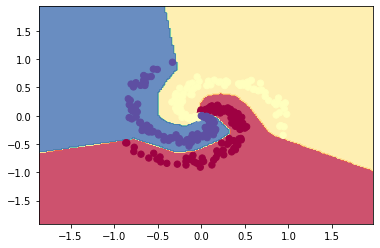

In [ ]:
h=0.02
x_min,x_max=X[:, 0].min()-1 , X[:, 0].max() + 1 #X[:,0]=first column of X and X[:,1]=second column of X
print("x_min:",x_min)
print("x_max:",x_max)
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print("y_min:",y_min)
print("y_max:",y_max)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
print(xx.shape) 
print("xx:\n",xx)
print(yy.shape)
print("yy:\n",yy)

print("\n")
print(xx.ravel())
print(yy.ravel())
print("\n")
print(np.c_[xx.ravel(),yy.ravel()])
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())